In [130]:
%matplotlib inline
import numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [131]:
def lin(a,b,x):
    return a*x + b

In [132]:
a=3
b=8

In [133]:
n = 30
x = random(n)

In [134]:
y = lin(a,b,x)

In [135]:
x

array([ 0.7833,  0.019 ,  0.1536,  0.2619,  0.0226,  0.7184,  0.0496,  0.3702,  0.8071,  0.7914,
        0.2681,  0.7656,  0.9629,  0.9732,  0.3599,  0.2665,  0.821 ,  0.4224,  0.2797,  0.1273,
        0.7958,  0.0719,  0.268 ,  0.5801,  0.7161,  0.0806,  0.7917,  0.248 ,  0.4705,  0.5689])

In [136]:
y

array([ 10.35  ,   8.0571,   8.4607,   8.7857,   8.0678,  10.1553,   8.1488,   9.1106,  10.4214,
        10.3743,   8.8042,  10.2968,  10.8886,  10.9195,   9.0796,   8.7995,  10.463 ,   9.2673,
         8.8392,   8.3819,  10.3874,   8.2157,   8.8039,   9.7403,  10.1484,   8.2418,  10.3752,
         8.7439,   9.4114,   9.7067])

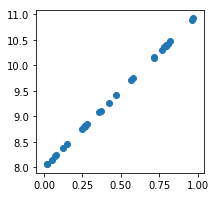

In [137]:
plt.scatter(x,y)

In [138]:
# mi loss function es SSE (sum of square error)
def sse(y, y_pred):
    return ((y-y_pred)**2).sum()

In [139]:
#Asi calculo la loss function. Es la suma de errores cuadrados de la funcion lineal lin(a,b,x)
def loss(y,a,b,x):
    return sse(y, lin(a,b,x))

In [140]:
#Aca calculo el promedio de la funcion de costos. 
def avg_loss(y, a, b, x):
    return np.sqrt(loss(y,a,b,x) / n)

In [145]:
a_guess = -1
b_guess = 1
avg_loss(y, a_guess, b_guess, x)

8.9248

In [142]:
lr = 0.01

In [143]:
def update():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2*(y_pred - y) #d[(y-(a*x+b))**2,b] => 2(ax + b - y) => 2*(lin(a_guess,b_guess,x) - y) => 2*(y_pred - y)
    dyda = x*dydb #d[(y-(a*x+b))**2,a] => 2x(b + a x - y) => 2x(y_pred-y) => x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [146]:

fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess, x))
    for i in range(25):
        update()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [100]:
ani